In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import folium

In [2]:
df = pd.read_csv('../data/preprocessed/location_added_cleaned.csv').drop('Unnamed: 0', axis=1)

## Feature Engineering

In [ ]:
def feature_engineering(df):
    df['price_per_sqm'] = df['price'] / df['squer']
    df = df.dropna()
    return df

### Custom Transformer for Feature Engineering

In [4]:
class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X['price_per_sqm'] = X['price'] / X['squer']
        X.dropna(subset=['price_per_sqm'], inplace=True)
        return X

In [5]:
pipeline = Pipeline([
    ('Feature_engineering', FeatureEngineeringTransformer())
])

df = pipeline.fit_transform(df)
df

,title,price,squer,room,city,addres,floor,metr,new_rem,auction,quiet_area,furniture,center,parking,full_address,latitude,longitude,price_per_sqm
0,вул. Віри Надії Любові,120000,77,2,Львів,Шевченківський\n ·,4,1527,1,0,0,0,0,0,"вул. Віри Надії Любові, Львів, Україна",49.877640,24.036435,1558.441558
1,вул. Любінська,55000,44,2,Львів,Залізничний\n ·,1,1259,0,0,1,0,0,0,"вул. Любінська, Львів, Україна",49.827064,23.982754,1250.000000
2,"вул. Городоцька, 226А",83000,39,1,Львів,Залізничний\n ·,9,2128,0,0,1,0,0,0,"вул. Городоцька, 226А, Львів, Україна",49.827723,23.947917,2128.205128
3,вул. Яцкова Михайла,128000,105,3,Львів,Шевченківський\n ·,5,1224,0,0,0,0,0,0,"вул. Яцкова Михайла, Львів, Україна",49.848317,24.005039,1219.047619
4,просп. Червоної Калини,130000,163,4,Львів,Сихівський\n ·,3,796,0,0,1,0,0,0,"просп. Червоної Калини, Львів, Україна",49.803775,24.046454,797.546012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,"вул. Руська, 235Д",65000,69,3,Чернівці,Першотравневий\n ·,1,942,0,0,0,0,0,0,"вул. Руська, 235Д, Чернівці, Україна",48.279536,25.984412,942.028986
1623,"вул. Руська, 223",52500,60,2,Чернівці,Гравітон\n ·,9,875,0,0,0,0,0,0,"вул. Руська, 223, Чернівці, Україна",48.282558,25.981849,875.000000
1624,"вул. Руська, 235В",60000,65,1,Чернівці,Першотравневий\n ·,1,923,0,0,1,0,0,0,"вул. Руська, 235В, Чернівці, Україна",48.278908,25.983875,923.076923
1625,"вул. Героїв Майдану, 154",97000,72,2,Чернівці,Комарова-Красноармійська\n ...,6,1347,0,0,0,0,0,0,"вул. Героїв Майдану, 154, Чернівці, Україна",48.273229,25.928530,1347.222222


In [6]:
X = df[['squer', 'room', 'floor', 'metr', 'new_rem', 'auction', 'quiet_area', 'furniture', 'center', 'parking', 'price_per_sqm']]
y = df['price']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
lr.score(X_train_scaled, y_train)

0.7748672270285454

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

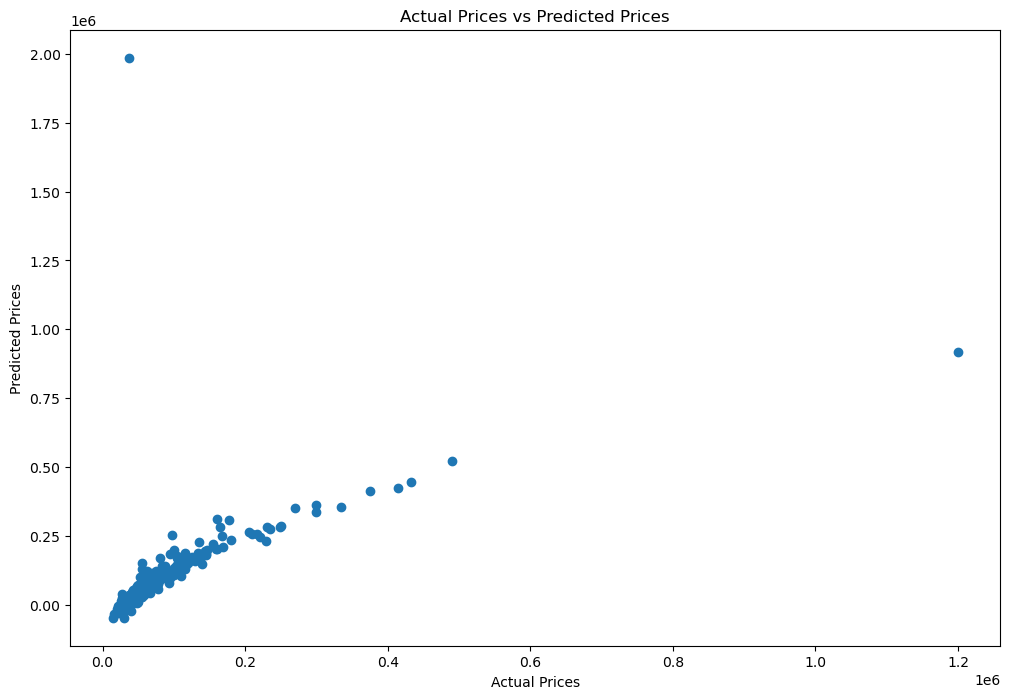

In [21]:
plt.figure(figsize=(12, 8))

plt.scatter(y_test, lr.predict(X_test_scaled))
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')

### Random Forest

In [22]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
    
predictions = rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Model Mean Squared Error: {mse}')

Model Mean Squared Error: 597652753.6385696


In [23]:
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.976172361866456

In [12]:
def visualize_predictions(df, model):
    df['predicted_price'] = model.predict(df[['squer', 'room', 'floor', 'metr', 'new_rem', 'auction', 'quiet_area', 'furniture', 'center', 'parking', 'price_per_sqm']])
    
    # Plotting on the map
    map_center = [df['latitude'].mean(), df['longitude'].mean()]
    folium_map = folium.Map(location=map_center, zoom_start=7)
    
    for index, row in df.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"Price: ${row['price']}, Predicted: ${row['predicted_price']}",
            tooltip=row['title']
        ).add_to(folium_map)
    
    folium_map.save('ukraine_real_estate_map.html')
    print("Map has been saved to 'ukraine_real_estate_map.html'")

visualize_predictions(df, rf)

Map has been saved to 'ukraine_real_estate_map.html'


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

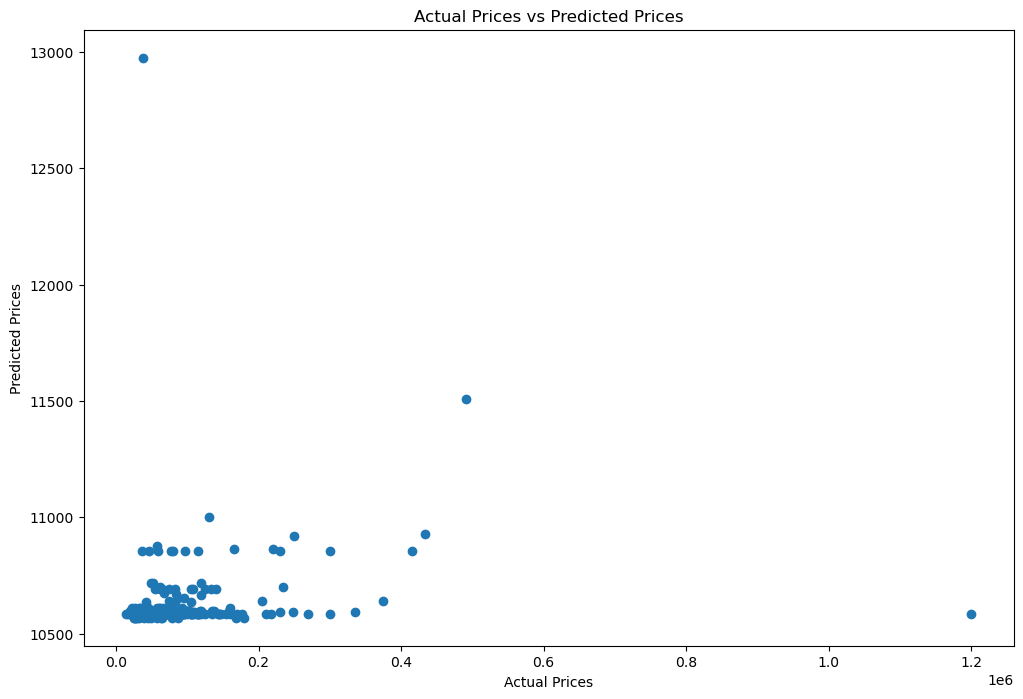

In [24]:
plt.figure(figsize=(12, 8))

plt.scatter(y_test, rf.predict(X_test_scaled))
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')

### Keras model

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [26]:
keras_model = Sequential()

# Input layer with 10 features, and first hidden layer with 64 neurons
keras_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Adding more hidden layers
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(16, activation='relu'))

# Output layer with one neuron (for regression)
keras_model.add(Dense(1, activation='linear'))


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
keras_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [28]:
history = keras_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 33694750720.0000 - mae: 94451.2812 - val_loss: 13885684736.0000 - val_mae: 79915.0547
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38578937856.0000 - mae: 90581.7734 - val_loss: 13747787776.0000 - val_mae: 79359.0156
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27789178880.0000 - mae: 87621.4219 - val_loss: 13406755840.0000 - val_mae: 77966.6953
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22874263552.0000 - mae: 81392.8047 - val_loss: 12557136896.0000 - val_mae: 74399.2969
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23565402112.0000 - mae: 82651.9062 - val_loss: 10567671808.0000 - val_mae: 65407.8086
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16519605248.0000 - mae: 69347.7188 - val_loss: 7427234816.0000 - val_mae: 48823.2969
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20730376192.0000 - mae: 51529.7305 - val_loss: 4153529856.0000 - val_mae

In [29]:
loss, mae = keras_model.evaluate(X_test, y_test, verbose=1)
print(f"Test MAE: {mae}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 3146608640.0000 - mae: 44170.5078
Test MAE: 45299.6484375


In [35]:
y_pred = keras_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
R-squared score: 0.5203083753585815


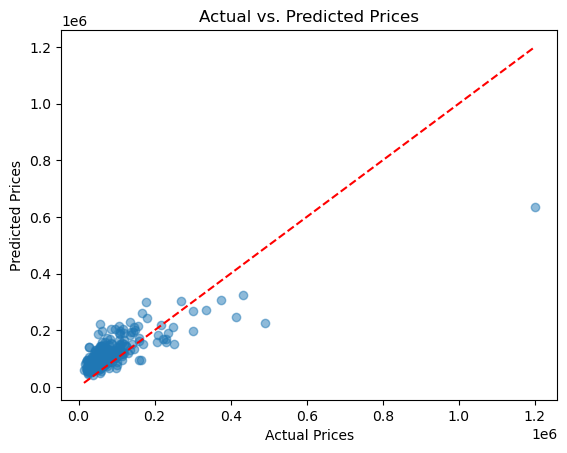

In [33]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

### PyTorch model

In [36]:
import torch
import torch.nn as nn